**Importation des CSV**

In [1]:
# Importation de Pandas
import pandas as pd
#Importation de Numpy
import numpy as np
# Importation de Matplotlib
import matplotlib.pyplot as plt
# Importation Seaborn
import seaborn as sns
# Importation du 1er CSV : Population 
pop = pd.read_csv('population.csv')
# Importation du 2ème CSV : Insécurité_alimentaire
ia = pd.read_csv('insécurité_alimentaire.csv')
# Importation du 3ème CSV : Dispo_alimentaire
da = pd.read_csv('dispo_alimentaire.csv')
# Importation du 4ème CSV : Aide_alimentaire
aa = pd.read_csv('aide_alimentaire.csv')
# Définition de 2 décimales après chaque résultat
pd.set_option('display.precision',2)

**1. Population**

In [2]:
# Renommage des variables 'Zone' et "Valeur" en 'Pays' et "Population"
pop.rename(columns={'Zone': "Pays", 'Valeur': "Population"}, inplace = True)
# Correction de la variable "Pays"
pop['Population'] *= 1000
pop.sample(5)

,Pays,Année,Population
544,Île de Man,2017,8.36e+04
88,Australie,2017,2.46e+07
119,Bangladesh,2018,1.61e+08
950,Ouganda,2015,3.82e+07
1275,Suède,2016,9.84e+06


**2. Insécurité Alimentaire**
***(sous-nutrition)***

In [3]:
# Changement format 'Valeur' de 'object' à 'float64'
ia['Valeur'] = pd.to_numeric(ia['Valeur'], errors='coerce')

# Correction de la variable "Valeur" : transformer en habitants
ia['Valeur'] *= 1000000

# Renommage des variables "Zone" et "Valeur" en "Pays" et "Population en sous-nutrition"
ia.rename(columns={'Zone':"Pays", 'Valeur': "Population en sous-nutrition"}, inplace = True)

# Transformation du format de l'année : moyenne d'année au lieu d'un intervalle ;
# on joint les tables "population" et "insécurité alimentaire"
nb_sous_nutrition = pd.merge(pop.loc[pop['Année'] == 2017,["Pays", "Population"]],
                               ia.loc[ia['Année'] == '2016-2018',["Pays", "Population en sous-nutrition"]],
                               on='Pays')

# Remplissage des valeurs nulles
nb_sous_nutrition.fillna(0, inplace = True)

# Pourcentage population en sous-nutrition (par pays)
nb_sous_nutrition['Pourcentage']= nb_sous_nutrition["Population en sous-nutrition"] / nb_sous_nutrition["Population"]*100

# Apparition de la jointure pour 2017
nb_sous_nutrition['Année']= 2017
nb_sous_nutrition.sample(5)

,Pays,Population,Population en sous-nutrition,Pourcentage,Année
10,Arménie,2.94e+06,0.00e+00,0.00,2017
18,Bélarus,9.45e+06,0.00e+00,0.00,2017
57,Espagne,4.66e+07,0.00e+00,0.00,2017
93,Japon,1.28e+08,0.00e+00,0.00,2017
34,Cameroun,2.46e+07,1.60e+06,6.51,2017


**3. Disponibilité alimentaire**

In [4]:
# Renommage de Zone en "Pays" et Disponibilité alimentaire (Kcal/personne/jour) en 
# "Disponibilité alimentaire (cal/personne/jour)"
da.rename(columns={'Zone':"Pays", 'Disponibilité alimentaire (Kcal/personne/jour)'
:"Disponibilité alimentaire (cal/personne/jour)"}, inplace = True)

# remplissage des valeurs nulles
da.fillna(0, inplace = True)

# Transformation des milliers de tonnes en tonnes :
tonnes = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for x in tonnes:
    da[x] *= 1000

da.sample(5)

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (cal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7284,Kazakhstan,Pommes,vegetale,1000.0,0.0,53.0,41.91,0.20,0.36,6.93e+05,84000.0,633000.0,6.89e+05,3000.0,1.44e+05,0.0,1000.0,0.0
4023,Danemark,Abats Comestible,animale,18000.0,0.0,21.0,6.83,0.65,3.44,5.70e+04,264000.0,79000.0,3.80e+04,0.0,2.42e+05,0.0,0.0,0.0
11777,République de Corée,Oignons,vegetale,0.0,0.0,26.0,24.70,0.14,1.02,1.35e+06,1000.0,59000.0,1.22e+06,135000.0,1.29e+06,0.0,0.0,0.0
10801,Pays-Bas,Animaux Aquatiques Autre,animale,0.0,36000.0,0.0,0.21,0.00,0.01,4.00e+04,0.0,40000.0,4.00e+03,0.0,0.00e+00,0.0,0.0,0.0
10718,Paraguay,Café,vegetale,0.0,0.0,0.0,0.39,0.00,0.02,3.00e+03,0.0,2000.0,3.00e+03,0.0,0.00e+00,0.0,0.0,0.0


**4. Aide alimentaire**

In [5]:
# Renommage de la colonne "Valeur" en "Quantité d'aide alimentaire donnée (en tonnes)"
aa.rename(columns={'Valeur':"Quantité d'aide alimentaire donnée"}, inplace = True)
aa.sample(5)

,Pays bénéficiaire,Année,Produit,Quantité d'aide alimentaire donnée
918,Niger,2013,Non-céréales,4644
526,Haïti,2016,Huiles végétales,516
816,Mozambique,2013,Huiles végétales,11070
727,Madagascar,2015,Huiles végétales,512
273,Côte d'Ivoire,2015,Céréales,5297


**Questions**
***pour 2017***

****Question 1****

In [6]:
# Proportion de personnes en état de sous-nutrition : Diviser la pop en sous-nutrition par la pop totale

# On obtient le total de la pop en sous-nutrition
print(nb_sous_nutrition['Population en sous-nutrition'].sum())

# On obtient le total de la pop mondiale en 2017
pop_2017 = (pop.loc[pop['Année']==2017,['Population']])
print(pop_2017.sum())

# On divise la population en sous-nutrition par la population mondiale
prop_psn = (nb_sous_nutrition['Population en sous-nutrition'].sum() / pop_2017['Population'].sum())*100
print(round(prop_psn, 2),"%") 

535700000.0
Population    7.55e+09
dtype: float64
7.1 %


****Question 2****

In [7]:
# Nombre théorique de personnes qui pourraient être nourries
# Calcul à partir de la disponibilité alimentaire mondiale
# Prendre comme référence l'apport nutritionnel de 2500 calories par jour
# Total dispo ali / 2500 * 365

# Fusion du df disponibilité alimentaire avec la population 2017 
nbt = da.merge(pop.loc[pop['Année']==2017,['Pays','Population']],
             on = 'Pays')

# Disponibilité totale en calorie de toute la population de 2017 sur une année entière
nbt['Dispo_cal'] = round(nbt['Disponibilité alimentaire (cal/personne/jour)'] * nbt['Population'] * 365)
print("Disponibilité alimentaire totale:","{:,}".format(nbt['Dispo_cal'].sum()))

# nb personnes pouvant être nourries
nbpn = nbt["Dispo_cal"].sum()/(2500*365)
print("Total d'êtres humains pouvant être nourris :",'{:,}'.format(nbpn))

# Proportion
part = nbpn*100/pop_2017["Population"].sum()
print("Proportion:","{:.2f}".format(part),"%")

Disponibilité alimentaire totale: 7,635,429,388,975,815.0
Total d'êtres humains pouvant être nourris : 8,367,593,850.9324
Proportion: 110.86 %


****Question 3****

In [8]:
# disponibilité alimentaire des produits végétaux, i-e combien de personnes pourraient être nourries avec seulement des 
# produits végétaux ?
# Total dispo ali des produits végétaux / (2000 * 365)

# Dispo cal végétaux
dav = nbt.loc[nbt['Origine'] == 'vegetale',:] 
dav['Dispo_cal'].sum()

# nb personnes pouvant être nourries (végétale)
nbpn_v = round(dav['Dispo_cal'].sum()/(2500*365))
nbpn_v

# Pourcentage / part
part_v = (nbpn_v*100/pop_2017['Population'].sum()) 
part_v

print("dispo alimentaire totale en cal des produits végétaux :", "{:,}".format(dav['Dispo_cal'].sum(), "cal"))
print("Total d'êtres humains pouvant être nourris :","{:,}".format(nbpn_v))
print("Proportion :", "{:.2f}".format(part_v), "%")

dispo alimentaire totale en cal des produits végétaux : 6,300,178,937,197,865.0
Total d'êtres humains pouvant être nourris : 6,904,305,685
Proportion : 91.47 %


****Question 4****

In [9]:
# utilisation de la disponibilité intérieure: pour les animaux, pour la perte et pour l'homme
# proviennent toutes de la même table
# Nourriture / disponibilité intérieure
# Aliments pour animaux / disponibilité intérieure
# Pertes / Disponibilité intérieure

# Essaie d'itérer un même calcul pour 3 variables dans une boucle for
udi = [['Nourriture','Aliments pour animaux','Pertes']]

for x in udi:
    p = da[x].sum() / da['Disponibilité intérieure'].sum() *100

p

Nourriture               49.51
Aliments pour animaux    13.24
Pertes                    4.61
dtype: float64

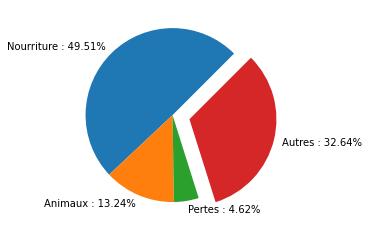

In [10]:
y = (49.51, 13.24, 4.61, 32.64)

newlabels = ["Nourriture : 49.51%","Animaux : 13.24%","Pertes : 4.62%", "Autres : 32.64%"]
myexplosion = [0, 0, 0, 0.2]

plt.pie(y, labels = newlabels, startangle = 45, explode = myexplosion)

plt.show()

**Partie 2**

In [11]:
# Pays où la proportion de personnes sous-alimentées est la plus forte en 2017

nb_sous_nutrition.nlargest(6, "Pourcentage")

,Pays,Population,Population en sous-nutrition,Pourcentage,Année
78,Haïti,1.10e+07,5.30e+06,48.26,2017
157,République populaire démocratique de Corée,2.54e+07,1.20e+07,47.19,2017
108,Madagascar,2.56e+07,1.05e+07,41.06,2017
103,Libéria,4.70e+06,1.80e+06,38.28,2017
100,Lesotho,2.09e+06,8.00e+05,38.25,2017
183,Tchad,1.50e+07,5.70e+06,37.96,2017


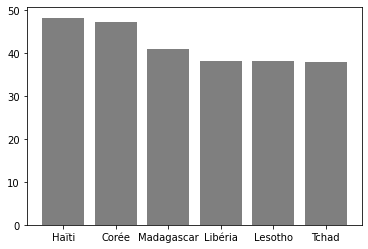

In [12]:
x = np.array(["Haïti","Corée","Madagascar","Libéria","Lesotho","Tchad"])
y = np.array([48.26, 47.19, 41.06, 38.28, 38.25, 37.96])

plt.bar(x, y, color = "k", alpha = 0.5)

plt.show()

In [13]:
# Pays qui ont le plus bénéficié d'aide depuis 2013

pb = aa.loc[aa["Année"]>= 2013]
pb1= pb.groupby(["Pays bénéficiaire"]).sum()
pb2 = pb1.nlargest(6, "Quantité d'aide alimentaire donnée")
pb2.drop(["Année"], axis = 1)

,Quantité d'aide alimentaire donnée
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836


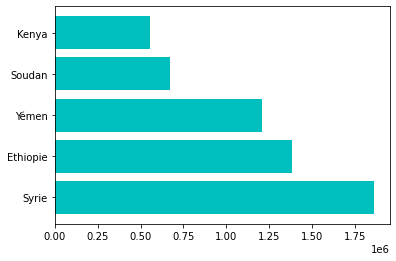

In [14]:
x = np.array(["Syrie","Ethiopie","Yémen","Soudan","Kenya"])
y = np.array([1858943, 1381294, 1206484, 669784, 552836])

plt.barh(x, y, color = "c", alpha = 1)

plt.show()

In [15]:
# Pays ayant le plus / le moins de disponibilité alimentaire par habitant

ppda = da.groupby(["Pays"]).sum()
ppda1 = ppda.nlargest(5, "Disponibilité alimentaire en quantité (kg/personne/an)")
ppda1

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (cal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,
Monténégro,1.73e+05,2.10e+04,3490.0,1210.41,131.66,111.90,1.01e+06,4.10e+04,4.58e+05,7.52e+05,33000.0,5.91e+05,3000.0,29000.0,0.0
Luxembourg,1.47e+05,1.10e+04,3540.0,1150.66,141.49,113.64,8.02e+05,8.21e+05,1.08e+06,6.07e+05,11000.0,5.93e+05,9000.0,24000.0,-41000.0
Irlande,3.76e+06,1.12e+06,3602.0,1150.15,125.69,109.91,1.07e+07,6.83e+06,6.25e+06,5.32e+06,236000.0,1.15e+07,89000.0,399000.0,-192000.0
Albanie,6.60e+05,1.74e+05,3188.0,1095.54,106.48,111.37,4.76e+06,9.40e+04,9.33e+05,3.48e+06,276000.0,3.96e+06,55000.0,113000.0,-45000.0
Finlande,2.15e+06,6.41e+05,3366.0,1093.77,140.02,117.56,1.00e+07,2.04e+06,3.28e+06,5.94e+06,40000.0,9.29e+06,321000.0,939000.0,-493000.0


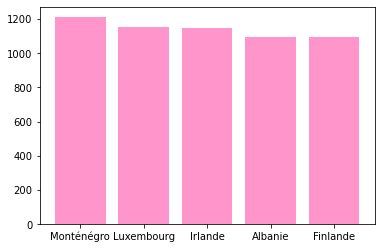

In [16]:
x = np.array(["Monténégro","Luxembourg","Irlande","Albanie","Finlande"])
y = np.array([1210.41, 1150.66, 1150.15, 1095.54, 1093.77])

plt.bar(x, y, color = "hotpink", alpha = 0.7)

plt.show()

In [17]:
pmda = da.groupby("Pays").sum()
pmda1 = pmda.nsmallest(5, "Disponibilité alimentaire en quantité (kg/personne/an)")
pmda1

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (cal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,
Tchad,104000.0,2.00e+03,2109.0,319.45,47.10,62.75,5.30e+06,0.0,2.90e+05,4.10e+06,4.59e+05,5.15e+06,101000.0,5.42e+05,-1.41e+05
Zimbabwe,131000.0,2.30e+04,2113.0,336.59,57.18,48.32,9.51e+06,278000.0,1.34e+06,4.76e+06,1.88e+05,7.91e+06,76000.0,4.33e+06,5.31e+05
Zambie,408000.0,6.90e+04,1924.0,350.12,42.05,55.22,1.00e+07,675000.0,3.80e+05,5.09e+06,2.42e+05,1.05e+07,76000.0,4.18e+06,-1.82e+05
Afghanistan,768000.0,4.15e+05,2087.0,351.41,33.50,58.26,1.35e+07,278000.0,2.99e+06,1.07e+07,1.14e+06,1.12e+07,395000.0,6.30e+04,-3.68e+05
Éthiopie,685000.0,3.64e+06,2129.0,354.55,25.89,60.39,4.40e+07,941000.0,1.71e+06,3.34e+07,2.26e+06,4.61e+07,640000.0,3.44e+06,-2.86e+06


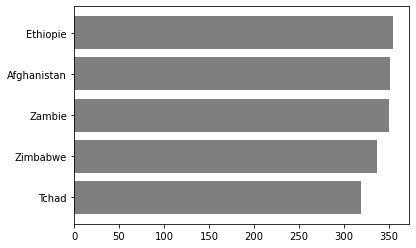

In [18]:
x = np.array(["Tchad","Zimbabwe","Zambie","Afghanistan","Ethiopie"])
y = np.array([319.45, 336.59, 350.12, 351.41, 354.55])

plt.barh(x, y, color = "k", alpha = 0.5)

plt.show()

**Autres infos utiles (supplément)**

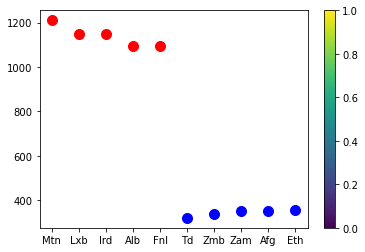

In [19]:
# Comparaison des pays qui ont la plus forte disponibilité en kg/personne 
# aux pays qui en ont le moins :

x = np.array(["Mtn","Lxb","Ird","Alb","Fnl"])
y = np.array([1210.41, 1150.66, 1150.15, 1095.54, 1093.77])
plt.scatter(x, y, color = 'r', s = 100, alpha = 1)


x = np.array(["Td","Zmb","Zam","Afg","Eth"])
y = np.array([319.45, 336.59, 350.12, 351.41, 354.55])

plt.colorbar()

plt.scatter(x, y, color = 'b', s = 100, alpha = 1)
plt.show()

In [20]:
# Répartition céréales animaux & hommes

rep1 = da.loc[da["Produit"].str.startswith('Céréales')].mean()
rep2 = rep1[["Aliments pour animaux","Nourriture"]]
rep2

Aliments pour animaux    110668.60
Nourriture                30953.49
dtype: float64

***Proportion en sous nutrition en Thaïlande et la proportion de manioc exportée en thailande***

In [21]:
psn = nb_sous_nutrition.loc[nb_sous_nutrition["Pays"]=="Thaïlande"]
psn

,Pays,Population,Population en sous-nutrition,Pourcentage,Année
185,Thaïlande,6.92e+07,6.20e+06,8.96,2017


In [22]:
pmt = da.loc[(da["Pays"]=="Thaïlande") & (da["Produit"]=="Manioc")]
pmt[["Pays","Produit","Exportations - Quantité","Nourriture","Production"]]


,Pays,Produit,Exportations - Quantité,Nourriture,Production
13809,Thaïlande,Manioc,2.52e+07,871000.0,3.02e+07


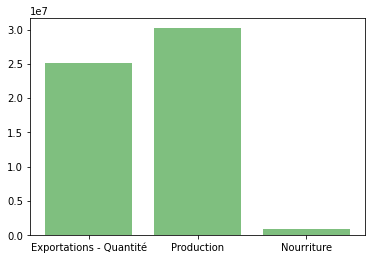

In [23]:
x = np.array(["Exportations - Quantité","Production","Nourriture"])
y = np.array([2.52e+07, 3.02e+07, 871000.0])

plt.bar(x, y, color = "g", alpha = 0.5)

plt.show()

**Rapport production / Exportation pays riches vs production / exportation pays pauvres**

In [31]:
p1 = nbt.groupby("Pays").sum()
p2 = p1.loc[p1["Disponibilité alimentaire (cal/personne/jour)"]<= 2100].mean()
p2[["Exportations - Quantité","Production","Nourriture"]]

Exportations - Quantité    2.14e+05
Production                 9.55e+06
Nourriture                 7.20e+06
dtype: float64

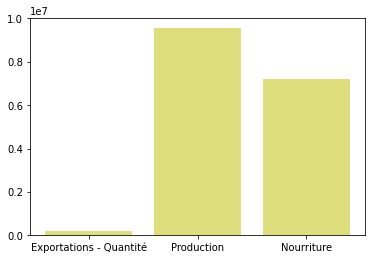

In [32]:
x = np.array(["Exportations - Quantité","Production","Nourriture"])
y = np.array([2.14e+05, 9.55e+06, 7.20e+06])

plt.bar(x, y, color = "y", alpha = 0.5)

plt.show()

In [26]:
p1 = nbt.groupby("Pays").sum()
p2 = p1.loc[p1["Disponibilité alimentaire (cal/personne/jour)"]>= 2100].mean()
p2[["Exportations - Quantité","Production","Nourriture"]]

Exportations - Quantité    8.02e+06
Production                 5.94e+07
Nourriture                 2.87e+07
dtype: float64

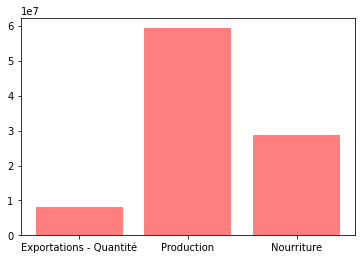

In [30]:
x = np.array(["Exportations - Quantité","Production","Nourriture"])
y = np.array([8.02e+06, 5.94e+07, 2.87e+07])

plt.bar(x, y, color = "r", alpha = 0.5)

plt.show()

In [28]:
# Idem pour la Thaïlande

p1 = nbt.groupby("Pays").sum()
p2 = da.loc[da["Pays"]=="Thaïlande"].sum()
p2[["Exportations - Quantité","Production","Nourriture"]]

Exportations - Quantité     50430000.0
Production                 201764000.0
Nourriture                  39283000.0
dtype: object

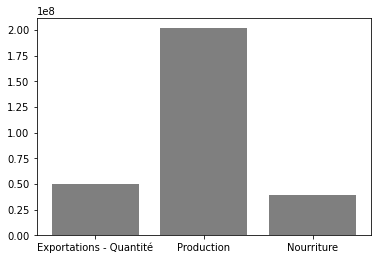

In [29]:
x = np.array(["Exportations - Quantité","Production","Nourriture"])
y = np.array([50430000, 201764000, 39283000])

plt.bar(x, y, color = "k", alpha = 0.5)

plt.show()

Contrairement aux autres pays, la Thaïlande a tendance à davantage exporter